<a href="https://colab.research.google.com/github/jon-chun/sentiment_cruxes/blob/main/sa_gutenberg_class_Nov3rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jon Chun
24 Oct 2021

# **Setup and Configuration**

In [1]:
!pip install texthero

     |████████████████████████████████| 235 kB 4.5 MB/s 
     |████████████████████████████████| 1.5 MB 34.2 MB/s 
     |████████████████████████████████| 749 kB 36.5 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import string
import re

In [4]:
from google.colab import files

In [5]:
%matplotlib inline

In [6]:
plt.rcParams["figure.figsize"] = (20,10)

# **Get the Novel Text**

## **OPTION (a): Connect and Read from gDrive** *italicized text*

(Upload novel textfile to Google Drive under root folder **./MyDrive** first)

In [7]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# drive.mount("/gdrive", force_remount=True)

In [8]:
!ls

MyDrive  Othercomputers


In [9]:
%cd ./MyDrive/

/gdrive/MyDrive


In [10]:
# %cd ./research/2021/sa_book_code/books_sa/bsmith_atreegrowsinbrooklyn/

%cd ./research/2021/sa_book_code/books_sa/wgolding_lordoftheflies/

/gdrive/MyDrive/research/2021/sa_book_code/books_sa/wgolding_lordoftheflies


In [11]:
!ls *.txt

lordoftheflies_william_golding.txt


In [12]:
novel_ls = []
novel_parags_ls = []

novel_filename = 'lordoftheflies_william_golding.txt'

In [13]:
#@title Enter the Novel_Title in the form [Title] by [Author]


Novel_Title = "Lord of the Flies by William Golding" #@param {type:"string"}

In [14]:
# Read novel into list of Sentences/lines

with open(novel_filename, 'r') as fp:
  novel_ls = fp.readlines()

print(f'Line Count: {len(novel_ls)}')

Line Count: 5442


In [15]:
print(novel_ls[:5])

['CHAPTER ONE\n', ' The Sound of the Shell\n', 'The boy with fair hair lowered himself down the last few feet of rock and began to pick\n', 'his way toward the lagoon. Though he had taken off his school sweater and trailed it now from\n', 'one hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him\n']


In [16]:
def strip_ascii(text):
  return "".join(
    char for char
    in text
    if 31 < ord(char) < 127
  )

In [17]:
# Strip out non-printable ASCII

# novel_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_ls]

novel_ls = [strip_ascii(x) for x in novel_ls]
novel_ls = [x for x in novel_ls if len(x) > 0]


In [18]:
print(novel_ls[:5])

['CHAPTER ONE', ' The Sound of the Shell', 'The boy with fair hair lowered himself down the last few feet of rock and began to pick', 'his way toward the lagoon. Though he had taken off his school sweater and trailed it now from', 'one hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him']


In [19]:
# Read novel into list of Paragraphs

delimiter = "\n\n"

with open(novel_filename, "r") as fp:
  all_content = fp.read() #reading all the content in one step
  #using the string methods we split it
  novel_parags_ls = all_content.split(delimiter)
  novel_parags_ls = [x.strip() for x in novel_parags_ls if len(x.strip()) > 2]

print(f'Paragraph Count: {len(novel_parags_ls)}')

Paragraph Count: 1


In [20]:
novel_parags_ls[:10]

['CHAPTER ONE\n The Sound of the Shell\nThe boy with fair hair lowered himself down the last few feet of rock and began to pick\nhis way toward the lagoon. Though he had taken off his school sweater and trailed it now from\none hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him\nthe long scar smashed into the jungle was a bath of heat. He was clambering heavily among the\ncreepers and broken trunks when a bird, a vision of red and yellow, flashed upwards with a\nwitch-like cry; and this cry was echoed by another.\n"Hi!" it said. "Wait a minute!"\nThe undergrowth at the side of the scar was shaken and a multitude of raindrops fell\npattering.\n"Wait a minute," the voice said. "I got caught up."\nThe fair boy stopped and jerked his stockings with an automatic gesture that made the\njungle seem for a moment like the Home Counties.\nThe voice spoke again.\n"I can\'t hardly move with all these creeper things."\nThe owner of the voice came backing out

In [21]:
novel_ls[4]

'one hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him'

In [22]:
novel_clean_str = '\n'.join(novel_ls)

novel_clean_str[:1000]

'CHAPTER ONE\n The Sound of the Shell\nThe boy with fair hair lowered himself down the last few feet of rock and began to pick\nhis way toward the lagoon. Though he had taken off his school sweater and trailed it now from\none hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him\nthe long scar smashed into the jungle was a bath of heat. He was clambering heavily among the\ncreepers and broken trunks when a bird, a vision of red and yellow, flashed upwards with a\nwitch-like cry; and this cry was echoed by another.\n"Hi!" it said. "Wait a minute!"\nThe undergrowth at the side of the scar was shaken and a multitude of raindrops fell\npattering.\n"Wait a minute," the voice said. "I got caught up."\nThe fair boy stopped and jerked his stockings with an automatic gesture that made the\njungle seem for a moment like the Home Counties.\nThe voice spoke again.\n"I can\'t hardly move with all these creeper things."\nThe owner of the voice came backing out 

## OPTION (b): **Scrape Project Gutenberg**

**Goto *https://gutenberg.net.au* and find the *.HTML (not *.TXT) version of your novel**

In [7]:
from bs4 import BeautifulSoup

import requests

In [528]:
#@title Enter the URL of your novel at ***gutenberg.net.au***
#@markdown Paste the URL to the ***HTML version*** (not plain text).

Novel_Title = "The Adventures of Huckleberry Finn by Mark Twain"  #@param {type: "string"}

Gutenberg_URL = 'https://gutenberg.org/cache/epub/76/pg76-images.html'  #@param {type: "string"}


In [529]:
# Get raw HTML of novel from Gutenberg.net.au

response=requests.get(Gutenberg_URL)  # TODO: Pass the URL to the .get() method of the requests object
html = response.text

In [530]:
# View raw HTML that we need to clean up

# TODO: What is the difference between these two outputs?

# Option A: 
html

# Option B:
# print(html)

'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta name="generator" content="HTML Tidy for HTML5 for Linux version 5.6.0">\r\n<title>The Project Gutenberg eBook of Adventures of Huckleberry Finn, By Mark Twain</title>\r\n<link rel="icon" href="images/cover.jpg" type="image/x-cover">\r\n<style>/**/\r\nbody {\r\n    margin-left: 10%;\r\n    margin-right: 10%;\r\n    background: #faebd0;\r\n    text-align: justify\r\n    }\r\nH1, H2, H3, H4, H5, H6 {\r\n    text-align: center;\r\n    margin-left: 15%;\r\n    margin-right: 15%\r\n    }\r\nhr {\r\n    width: 50%;\r\n    text-align: center\r\n    }\r\np {\r\n    text-indent: 1em;\r\n    margin-top: 0.25em;\r\n    margin-bottom: 0.25em\r\n    }\r\np.poem {\r\n    text-indent: 0%;\r\n    margin-left: 10%;\r\n    font-size: 90%;\r\n    margin-top: 1em;\r\n    margin-bottom: 1em\r\n    }\r\np.center {\r\n    text-align: center;\r\n    text-indent: 0;\r\n    margin-top: 1em;\r\n    margin-bottom: 1em\r\n    }\r\ndiv

## **Using Beautiful Soup**

In [531]:
#Create a BeautifulSoup object from the HTML

soup = BeautifulSoup(html, "html.parser")


paragraph=soup.find_all("p")  # TODO: get all the <P>Paragraphs</P> 
                                #       see bs4 API ref: https://beautiful-soup-4.readthedocs.io/en/latest/#kinds-of-objects
parag_ls = []
for para in paragraph:
    parag_ls.append(para.text)

print(f'There were {len(parag_ls)} Paragraphs:\n') # TODO how do you get the number of paragraphs in the list parag_ls?

print(f"First 3 Paragraphs: ==============================    \n")
print(f"    {list(print(x) for x in parag_ls[:3])}\n")  # TODO: Give index to retrieve the first 3 paragraphs

print(f"Last 3 Paragraphs: ============================== \n")
print(f"    {list(print(x) for x in parag_ls[-3:])}\n")  # TODO: Give index to retrieve the last 3 paragraphs


There were 2559 Paragraphs:

First 3 Paragraphs: ==============================    







    [None, None, None]

Last 3 Paragraphs: ============================== 

Tom’s most well now, and got his bullet around his neck on a watch-guard for a watch, and is always seeing what time it is, and so there ain’t nothing more to write about, and I am rotten glad of it, because if I’d a knowed what a trouble it was to make a book I wouldn’t a tackled it, and ain’t a-going to no more. But I reckon I got to light out for the Territory ahead of the rest, because Aunt Sally she’s going to adopt me and sivilize me, and I can’t stand it. I been there before.
THE END. YOURS TRULY, HUCK FINN.






    [None, None, None]



## **Using Python [string].partition() or RegEx**

In [532]:
# Concatenate all paragraphs into a single novel string

# For every paragraph, replace all hardcoded \r\n with a single space
parag_flat_ls = [re.sub(r'\r\n', ' ', aparag) for aparag in parag_ls]

# Concatenate all paragraphs into a single string, separated by \n
novel_str = '\n'.join(parag_flat_ls)

print('\nSTART OF NOVEL: -----')
print(novel_str[:1000] + '\n')

print('\nEND OF NOVEL: -----\n')
print(novel_str[-1000:])


START OF NOVEL: -----























CHAPTER I. Civilizing Huck.—Miss Watson.—Tom Sawyer Waits.

CHAPTER II. The Boys Escape Jim.—Torn Sawyer’s Gang.—Deep-laid Plans.

CHAPTER III. A Good Going-over.—Grace Triumphant.—“One of Tom Sawyers’s Lies”.

CHAPTER IV. Huck and the Judge.—Superstition.

CHAPTER V. Huck’s Father.—The Fond Parent.—Reform.

CHAPTER VI. He Went for Judge Thatcher.—Huck Decided to Leave.—Political Economy.—Thrashing Around.

CHAPTER VII. Laying for Him.—Locked in the Cabin.—Sinking the Body.—Resting.

CHAPTER VIII. Sleeping in the Woods.—Raising the Dead.—Exploring the Island.—Finding Jim.—Jim’s Escape.—Signs.—Balum.

CHAPTER IX. The Cave.—The Floating House.

CHAPTER X. The Find.—Old Hank Bunker.—In Disguise.

CHAPTER XI. Huck and the Woman.—The Search.—Prevarication.—Going to Goshen.

CHAPTER XII. Slow Navigation.—Borrowing Things.—Boarding the Wreck.—The Plotters.—Hunting for the Boat.

CHAPTER XIII. Escaping from the Wreck.—The Watchman.—Sinking.

CHAPTE

**Enter the First and Last several words to use as RegEx for trimming header/footers**

In [533]:
#@title Enter the first sentence in the body of your novel
sentence_first_str = 'You don\u2019t know about me without'  #@param {type: "string"}

#@title Enter the last sentence in the body of your novel
sentence_last_str = 'stand it. I been there before.'  #@param {type: "string"}


In [534]:
# Strip off the header
novel_clean = ' '.join(novel_str.partition(sentence_first_str)[1:])

# Strip off the footer
' '.join(novel_clean.partition(sentence_last_str)[:2])[-500:]

't wuz him.”\nTom’s most well now, and got his bullet around his neck on a watch-guard for a watch, and is always seeing what time it is, and so there ain’t nothing more to write about, and I am rotten glad of it, because if I’d a knowed what a trouble it was to make a book I wouldn’t a tackled it, and ain’t a-going to no more. But I reckon I got to light out for the Territory ahead of the rest, because Aunt Sally she’s going to adopt me and sivilize me, and I can’t  stand it. I been there before.'

In [535]:
# Strip off the header
novel_clean_str = ' '.join(novel_str.partition(sentence_first_str)[1:])

# Strip off the footer
novel_clean_str = ' '.join(novel_clean_str.partition(sentence_last_str)[:2])

# Verify

print('\nSTART OF CLEAN NOVEL: -----')
print(novel_clean_str[:1000] + '\n')

print('\nEND OF CLEAN NOVEL: -----\n')
print(novel_clean_str[-1000:])


START OF CLEAN NOVEL: -----
You don’t know about me without  you have read a book by the name of The Adventures of Tom Sawyer; but that ain’t no matter. That book was made by Mr. Mark Twain, and he told the truth, mainly. There was things which he stretched, but mainly he told the truth. That is nothing. I never seen anybody but lied one time or another, without it was Aunt Polly, or the widow, or maybe Mary. Aunt Polly—Tom’s Aunt Polly, she is—and Mary, and the Widow Douglas is all told about in that book, which is mostly a true book, with some stretchers, as I said before.
Now the way that the book winds up is this: Tom and me found the money that the robbers hid in the cave, and it made us rich. We got six thousand dollars apiece—all gold. It was an awful sight of money when it was piled up. Well, Judge Thatcher he took it and put it out at interest, and it fetched us a dollar a day apiece all the year round—more than a body could tell what to do with. The Widow Douglas she took me

# **Split Novel into Sentences**

* https://github.com/zaemyung/sentsplit (CRF: mincut)

* https://github.com/adobe/NLP-Cube and Rank ~15 https://aclanthology.org/K18-2017.pdf

In [23]:
# Read novel into list of Paragraphs

delimiter = "\n"

novel_parags_ls = novel_clean_str.split(delimiter)
novel_parags_ls = [x.strip() for x in novel_parags_ls if len(x.strip()) > 2]
novel_parags_ls = [' '.join(x.split()) for x in novel_parags_ls]

print(f'Paragraph Count: {len(novel_parags_ls)}')

Paragraph Count: 5439


In [24]:
novel_parags_ls[:15]

['CHAPTER ONE',
 'The Sound of the Shell',
 'The boy with fair hair lowered himself down the last few feet of rock and began to pick',
 'his way toward the lagoon. Though he had taken off his school sweater and trailed it now from',
 'one hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him',
 'the long scar smashed into the jungle was a bath of heat. He was clambering heavily among the',
 'creepers and broken trunks when a bird, a vision of red and yellow, flashed upwards with a',
 'witch-like cry; and this cry was echoed by another.',
 '"Hi!" it said. "Wait a minute!"',
 'The undergrowth at the side of the scar was shaken and a multitude of raindrops fell',
 'pattering.',
 '"Wait a minute," the voice said. "I got caught up."',
 'The fair boy stopped and jerked his stockings with an automatic gesture that made the',
 'jungle seem for a moment like the Home Counties.',
 'The voice spoke again.']

In [25]:
for i,aline in enumerate(novel_parags_ls):
  if (len(aline.strip()) < 5):
    print(f'Line #{i}: {aline}')

Line #229: him.
Line #629: it.
Line #1637: it?"
Line #4193: air.
Line #4634: -?"
Line #4772: in."
Line #5075: him.


In [26]:
# Prior several code blocks for future functionality, can start execution in this section with cell below

In [27]:
novel_clean_str = '\n'.join(novel_parags_ls)
novel_clean_str[:2000]

'CHAPTER ONE\nThe Sound of the Shell\nThe boy with fair hair lowered himself down the last few feet of rock and began to pick\nhis way toward the lagoon. Though he had taken off his school sweater and trailed it now from\none hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him\nthe long scar smashed into the jungle was a bath of heat. He was clambering heavily among the\ncreepers and broken trunks when a bird, a vision of red and yellow, flashed upwards with a\nwitch-like cry; and this cry was echoed by another.\n"Hi!" it said. "Wait a minute!"\nThe undergrowth at the side of the scar was shaken and a multitude of raindrops fell\npattering.\n"Wait a minute," the voice said. "I got caught up."\nThe fair boy stopped and jerked his stockings with an automatic gesture that made the\njungle seem for a moment like the Home Counties.\nThe voice spoke again.\n"I can\'t hardly move with all these creeper things."\nThe owner of the voice came backing out o

In [28]:
import nltk

nltk.download('punkt')

from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [29]:
novel_sents_ls = sent_tokenize(novel_clean_str)

sent_ct = len(novel_sents_ls)
sent_show = 10

print('\nFirst Sentences: -----\n')
# for i, asent in enumerate(novel_sents_ls[:sent_show]):
for i, asent in enumerate(novel_sents_ls[:sent_show]):
  print(f'Sentences #{i}: {asent}')


print('\nLast Sentences: -----\n')
for i, asent in enumerate(novel_sents_ls[-sent_show:]):
  print(f'Sentences #{sent_ct - (sent_show - i)}: {asent}')


print(f'\n\nThere are {sent_ct} Sentences in the novel')


First Sentences: -----

Sentences #0: CHAPTER ONE
The Sound of the Shell
The boy with fair hair lowered himself down the last few feet of rock and began to pick
his way toward the lagoon.
Sentences #1: Though he had taken off his school sweater and trailed it now from
one hand, his grey shirt stuck to him and his hair was plastered to his forehead.
Sentences #2: All round him
the long scar smashed into the jungle was a bath of heat.
Sentences #3: He was clambering heavily among the
creepers and broken trunks when a bird, a vision of red and yellow, flashed upwards with a
witch-like cry; and this cry was echoed by another.
Sentences #4: "Hi!"
Sentences #5: it said.
Sentences #6: "Wait a minute!"
Sentences #7: The undergrowth at the side of the scar was shaken and a multitude of raindrops fell
pattering.
Sentences #8: "Wait a minute," the voice said.
Sentences #9: "I got caught up."

Last Sentences: -----

Sentences #5978: But the island was scorched up like dead wood--
Simon was dead--

In [30]:
# View the Sentences that have no letters in them

[x.strip() for x in novel_sents_ls if not re.search('[a-zA-Z]', x)]

['.',
 '.',
 '.',
 '."',
 '.',
 '.',
 '.',
 '.',
 '."',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '."',
 '.',
 '.',
 '.',
 '.',
 '."',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '."',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '."',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '."',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.']

In [31]:
# Delete the short Sentences and those without any alphabetic characters

novel_sents_ls = [x.strip() for x in novel_sents_ls if len(x.strip()) > 2]
novel_sents_ls = [x.strip() for x in novel_sents_ls if re.search('[a-zA-Z]', x)]
len(novel_sents_ls)

5916

In [32]:
# View the shortest Setences

sorted(novel_sents_ls, key=len)[:100]
# type(min(novel_sents_ls, key=len))
# novel_sents_ls[:1000]

['No.',
 'No.',
 '"No.',
 '"No.',
 'You?',
 'Eh?"',
 'Hey!',
 'Two!',
 '"My!',
 'See?',
 '"No.',
 '"Me.',
 '"No.',
 '"Ow!',
 'oh .',
 'See?',
 'See?',
 '"Hi!',
 '"No!',
 'See?',
 '"No.',
 'See?',
 '"No.',
 '"Hi!"',
 '"No."',
 'Wait!',
 '"Eat!',
 'Now."',
 'See?"',
 '"You!',
 'Him."',
 '"But.',
 'Jack!',
 '"No."',
 '"Huh.',
 '"Sam!',
 'Sam!"',
 '"You.',
 'Now?"',
 '"Yes.',
 'See?"',
 '"Me."',
 '"Him!',
 'Him!"',
 '"Uh?"',
 '"Uh?"',
 '"Uh?"',
 '"Yes.',
 '"No!"',
 '"Sam!',
 'Sam!"',
 '"See?',
 '"See?',
 'See?"',
 '"See?',
 '"Two?',
 '"Yes!"',
 '"Men?"',
 '"Look!',
 'Look!"',
 '"Hunt.',
 'Three!',
 '"Psss.',
 'Psss."',
 'Water?',
 '"Well.',
 '"What?',
 'Where?',
 '"Look!',
 'There.',
 'Ever."',
 '"Pig."',
 '"Jack!',
 '"Jack!',
 'Jack!"',
 '"Huh."',
 '"Huh?"',
 'Here."',
 '"Well.',
 '"Why?"',
 '"Jack!',
 '"Jack.',
 '"Well.',
 '"Yes?"',
 '"Yes."',
 'Bill?"',
 '"Yes."',
 '--No!"',
 '"Yes!"',
 '"Now!"',
 'Of us.',
 '"Halt!',
 '"Yes?"',
 '"Halt!',
 '"Back!',
 'Jack?"',
 'Heave!',
 'Heave!',
 'H

In [33]:
len(novel_sents_ls)

5916

# **Expand Contractions**

In [34]:
!pip install contractions

     |████████████████████████████████| 321 kB 6.4 MB/s 
     |████████████████████████████████| 284 kB 31.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85454 sha256=3d8f3e99705c29d837deab4b5fca782db6d2f68478b60e06159fc21c76ead37f
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [35]:
import contractions
contractions.fix("you're happy now")

'you are happy now'

In [36]:
# novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_ls]
novel_clean_ls = [contractions.fix(x) for x in novel_ls]
novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_clean_ls]
novel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]
# novel_clean_ls = [re.sub(r"^[\"\']", "", x) for x in novel_clean_ls]  # re.sub("[\"\']", "", s)
# novel_clean_ls = [re.sub(r"[\"\']$", "", x) for x in novel_clean_ls]
novel_clean_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_clean_ls]
# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

[f'[{x}]' for x in novel_clean_ls]

['[CHAPTER ONE]',
 '[The Sound of the she will]',
 '[The boy with fair hair lowered himself down the last few feet of rock and began to pick]',
 '[his way toward the lagoon. Though he had taken off his school sweater and trailed it now from]',
 '[one hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him]',
 '[the long scar smashed into the jungle was a bath of heat. He was clambering heavily among the]',
 '[creepers and broken trunks when a bird, a vision of red and yellow, flashed upwards with a]',
 '[witch-like cry; and this cry was echoed by another.]',
 '["Hi!" it said. "Wait a minute!"]',
 '[The undergrowth at the side of the scar was shaken and a multitude of raindrops fell]',
 '[pattering.]',
 '["Wait a minute," the voice said. "I got caught up."]',
 '[The fair boy stopped and jerked his stockings with an automatic gesture that made the]',
 '[jungle seem for a moment like the Home Counties.]',
 '[The voice spoke again.]',
 '["I cannot hardly

In [37]:
novel_clean_str = '\n'.join(novel_clean_ls)
print(novel_clean_str[:5000])

CHAPTER ONE
The Sound of the she will
The boy with fair hair lowered himself down the last few feet of rock and began to pick
his way toward the lagoon. Though he had taken off his school sweater and trailed it now from
one hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him
the long scar smashed into the jungle was a bath of heat. He was clambering heavily among the
creepers and broken trunks when a bird, a vision of red and yellow, flashed upwards with a
witch-like cry; and this cry was echoed by another.
"Hi!" it said. "Wait a minute!"
The undergrowth at the side of the scar was shaken and a multitude of raindrops fell
pattering.
"Wait a minute," the voice said. "I got caught up."
The fair boy stopped and jerked his stockings with an automatic gesture that made the
jungle seem for a moment like the Home Counties.
The voice spoke again.
"I cannot hardly move with all these creeper things."
The owner of the voice came backing out of the undergro

In [38]:
# novel_clean_ls[1] = "THE SILVER SPOON I was born twice: first, as a baby girl, on a remarkably smogless Detroit day in January of 1960; and then again, as a teenage boy, in an emergency room near Petoskey, Michigan, in August of 1974. Specialized readers may have come across me in Dr. Peter Luce’s study, “Gender Identity in 5-Alpha-Reductase Pseudohermaphrodites,” published in theJournal of Pediatric Endocrinology in 1975. Or maybe you’ve seen my photograph in chapter sixteen of the now sadly outdatedGenetics and Heredity."

In [39]:
# novel_clean_ls.pop(0)

In [40]:
novel_clean_ls[:10]

['CHAPTER ONE',
 'The Sound of the she will',
 'The boy with fair hair lowered himself down the last few feet of rock and began to pick',
 'his way toward the lagoon. Though he had taken off his school sweater and trailed it now from',
 'one hand, his grey shirt stuck to him and his hair was plastered to his forehead. All round him',
 'the long scar smashed into the jungle was a bath of heat. He was clambering heavily among the',
 'creepers and broken trunks when a bird, a vision of red and yellow, flashed upwards with a',
 'witch-like cry; and this cry was echoed by another.',
 '"Hi!" it said. "Wait a minute!"',
 'The undergrowth at the side of the scar was shaken and a multitude of raindrops fell']

In [41]:
novel_clean_ls[-10:]

['Simon was dead--and Jack had. . . . The tears began to flow and sobs shook him. He gave',
 'himself up to them now for the first time on the island; great, shuddering spasms of grief that',
 'seemed to wrench his whole body. His voice rose under the black smoke before the burning',
 'wreckage of the island; and infected by that emotion, the other little boys began to shake and',
 'sob too. And in the middle of them, with filthy body, matted hair, and unwiped nose, Ralph',
 "wept for the end of innocence, the darkness of man's heart, and the fall through the air of the",
 'true, wise friend called Piggy.',
 'The officer, surrounded by these noises, was moved and a little embarrassed. He turned',
 'away to give them time to pull themselves together; and waited, allowing his eyes to rest on',
 'the trim cruiser in the distance.']

In [42]:
# novel_clean_str = '\n'.join(novel_clean_ls)

# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

# print(novel_clean_str[:5000])

# **Clean and Slice Strings**

In [43]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
hero.get_default_pipeline()

[<function texthero.preprocessing.fillna>,
 <function texthero.preprocessing.lowercase>,
 <function texthero.preprocessing.remove_digits>,
 <function texthero.preprocessing.remove_punctuation>,
 <function texthero.preprocessing.remove_diacritics>,
 <function texthero.preprocessing.remove_stopwords>,
 <function texthero.preprocessing.remove_whitespace>]

In [45]:
# Texthero works on Pandas Series

novel_df = pd.DataFrame({'text_raw': novel_sents_ls})
novel_df.head()

,text_raw
0,CHAPTER ONE\nThe Sound of the Shell\nThe boy w...
1,Though he had taken off his school sweater and...
2,All round him\nthe long scar smashed into the ...
3,He was clambering heavily among the\ncreepers ...
4,"""Hi!"""


In [46]:
# Convert string column/Series from 'object' to 'string'

novel_df['text_raw'] = novel_df['text_raw'].astype('string')
novel_df['text_raw'] = novel_df['text_raw'].str.strip()

novel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text_raw  5916 non-null   string
dtypes: string(1)
memory usage: 46.3 KB


In [47]:
# Use texthero.clean() to clean the 'text_raw' column and create the 'text_clean' column

novel_df['text_clean'] = hero.clean(novel_df['text_raw'])
novel_df.head()

,text_raw,text_clean
0,CHAPTER ONE The Sound of the Shell The boy wit...,chapter one sound shell boy fair hair lowered ...
1,Though he had taken off his school sweater and...,though taken school sweater trailed one hand g...
2,All round him the long scar smashed into the j...,round long scar smashed jungle bath heat
3,He was clambering heavily among the creepers a...,clambering heavily among creepers broken trunk...
4,"""Hi!""",hi


In [48]:
novel_df.shape

(5916, 2)

In [49]:
novel_df.head()

,text_raw,text_clean
0,CHAPTER ONE The Sound of the Shell The boy wit...,chapter one sound shell boy fair hair lowered ...
1,Though he had taken off his school sweater and...,though taken school sweater trailed one hand g...
2,All round him the long scar smashed into the j...,round long scar smashed jungle bath heat
3,He was clambering heavily among the creepers a...,clambering heavily among creepers broken trunk...
4,"""Hi!""",hi


In [50]:
# Delete the (near)null Sentences

novel_df['text_raw_len'] = novel_df['text_raw'].apply(lambda x : len(x.strip()))
novel_df.head()
novel_df.shape

(5916, 3)

In [51]:
# View the shortests Sentences before and after cleaning

novel_df.sort_values(by=['text_raw_len']).head(400)

,text_raw,text_clean,text_raw_len
2262,No.,,3
2090,No.,,3
2929,"""No.",,4
3190,"""Ow!",ow,4
372,"""No.",,4
...,...,...,...
2313,Understand?,understand,11
434,Jack spoke.,jack spoke,11
4862,"""Not much.""",much,11
2827,"""Sit down.""",sit,11


In [52]:
novel_df['text_raw_len'].value_counts().sort_values(na_position='first')[:50]

277    1
303    1
295    1
231    1
219    1
179    1
265    1
171    1
254    1
246    1
242    1
234    1
222    1
202    1
313    1
290    1
184    1
543    1
363    1
371    1
249    1
257    1
391    1
245    1
241    1
237    1
229    1
225    1
253    1
173    1
209    1
244    1
236    1
224    1
220    1
208    1
200    1
308    1
192    1
288    1
318    2
157    2
213    2
161    2
189    2
180    2
3      2
228    2
223    2
194    2
Name: text_raw_len, dtype: int64

In [53]:
# Drop Sentence if Raw length < 2

novel_df = novel_df[novel_df['text_raw_len'] > 2]
novel_df.shape

(5916, 3)

In [54]:
novel_df.text_clean = novel_df.text_clean.astype('string')
novel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5916 entries, 0 to 5915
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text_raw      5916 non-null   string
 1   text_clean    5916 non-null   string
 2   text_raw_len  5916 non-null   int64 
dtypes: int64(1), string(2)
memory usage: 184.9 KB


In [55]:
novel_df.sort_values(by=['text_raw_len']).head(20)

,text_raw,text_clean,text_raw_len
2262,No.,,3
2090,No.,,3
2929,"""No.",,4
3190,"""Ow!",ow,4
372,"""No.",,4
1005,"""My!",,4
5034,"""No.",,4
4147,See?,see,4
1617,"""No.",,4
974,Two!,two,4


# **Sentiment Analysis**

## **VADER**

In [56]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.2 MB/s 


In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa = SentimentIntensityAnalyzer()

In [58]:
vader_sa.polarity_scores('I love lint')['compound']

0.6369

In [59]:
novel_df['vader'] = novel_df['text_clean'].apply(lambda x : vader_sa.polarity_scores(x)['compound'])
novel_df.head(100)

,text_raw,text_clean,text_raw_len,vader
0,CHAPTER ONE The Sound of the Shell The boy wit...,chapter one sound shell boy fair hair lowered ...,149,0.2023
1,Though he had taken off his school sweater and...,though taken school sweater trailed one hand g...,148,0.3400
2,All round him the long scar smashed into the j...,round long scar smashed jungle bath heat,71,0.0000
3,He was clambering heavily among the creepers a...,clambering heavily among creepers broken trunk...,178,-0.8074
4,"""Hi!""",hi,5,0.0000
...,...,...,...,...
95,"He became conscious of the weight of clothes, ...",became conscious weight clothes kicked shoes f...,150,0.0000
96,"Then he leapt back on the terrace, pulled off ...",leapt back terrace pulled shirt stood among sk...,174,0.3612
97,"He undid the snake-clasp of his belt, lugged o...",undid snake clasp belt lugged shorts pants sto...,138,0.0000
98,"He was old enough, twelve years and a few mont...",old enough twelve years months lost prominent ...,160,-0.1531


## **TextBlob**

In [60]:
from textblob import TextBlob

In [61]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
print(testimonial.sentiment.polarity)

0.39166666666666666


In [62]:
novel_df['textblob'] = novel_df['text_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)
novel_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob
0,CHAPTER ONE The Sound of the Shell The boy wit...,chapter one sound shell boy fair hair lowered ...,149,0.2023,0.366667
1,Though he had taken off his school sweater and...,though taken school sweater trailed one hand g...,148,0.3400,-0.050000
2,All round him the long scar smashed into the j...,round long scar smashed jungle bath heat,71,0.0000,-0.125000
3,He was clambering heavily among the creepers a...,clambering heavily among creepers broken trunk...,178,-0.8074,-0.150000
4,"""Hi!""",hi,5,0.0000,0.000000


# **Plot Sentiment**

In [63]:
novel_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob
0,CHAPTER ONE The Sound of the Shell The boy wit...,chapter one sound shell boy fair hair lowered ...,149,0.2023,0.366667
1,Though he had taken off his school sweater and...,though taken school sweater trailed one hand g...,148,0.3400,-0.050000
2,All round him the long scar smashed into the j...,round long scar smashed jungle bath heat,71,0.0000,-0.125000
3,He was clambering heavily among the creepers a...,clambering heavily among creepers broken trunk...,178,-0.8074,-0.150000
4,"""Hi!""",hi,5,0.0000,0.000000


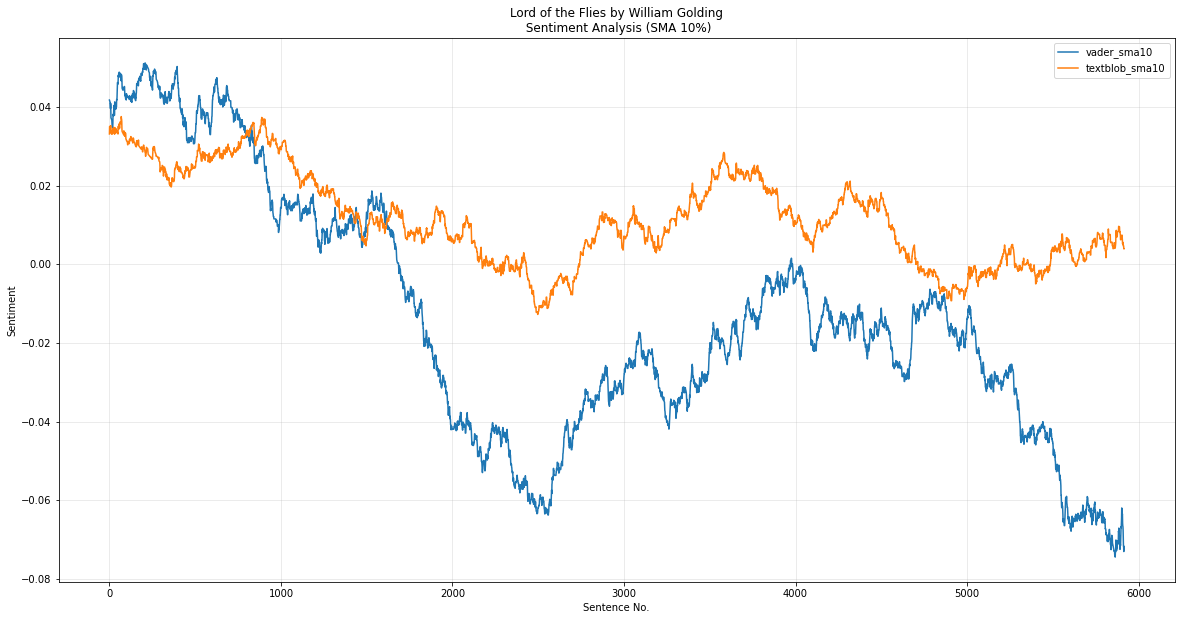

In [64]:
#@title Enter the Sliding Window width as Percent of Novel length (default 10%, larger=smoother)

window_percent = 10 #@param {type:"slider", min:1, max:20, step:1}

win_xper = int(window_percent/100 * novel_df.shape[0])

vader_col = f'vader_sma{window_percent}'
novel_df[vader_col] = novel_df['vader'].rolling(win_xper, center=True, min_periods=1).mean()

textblob_col = f'textblob_sma{window_percent}'
novel_df[textblob_col] = novel_df['textblob'].rolling(win_xper, center=True, min_periods=1).mean()
novel_df.plot(y=[vader_col, textblob_col])

plt.title(f'{Novel_Title}\n Sentiment Analysis (SMA {window_percent}%)')
plt.ylabel('Sentiment')
plt.xlabel('Sentence No.')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.show();

In [65]:
novel_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,vader_sma10,textblob_sma10
0,CHAPTER ONE The Sound of the Shell The boy wit...,chapter one sound shell boy fair hair lowered ...,149,0.2023,0.366667,0.041735,0.033122
1,Though he had taken off his school sweater and...,though taken school sweater trailed one hand g...,148,0.3400,-0.050000,0.041595,0.035031
2,All round him the long scar smashed into the j...,round long scar smashed jungle bath heat,71,0.0000,-0.125000,0.041455,0.034913
3,He was clambering heavily among the creepers a...,clambering heavily among creepers broken trunk...,178,-0.8074,-0.150000,0.041317,0.034796
4,"""Hi!""",hi,5,0.0000,0.000000,0.040837,0.033930


# **Crux Detection**

## **Scipy Signal Find_Peaks**

* https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy

In [66]:
from scipy.signal import find_peaks

In [67]:
#@title Which Lexicon?

Sentiment_Model = "VADER" #@param ["VADER", "TextBlob"]

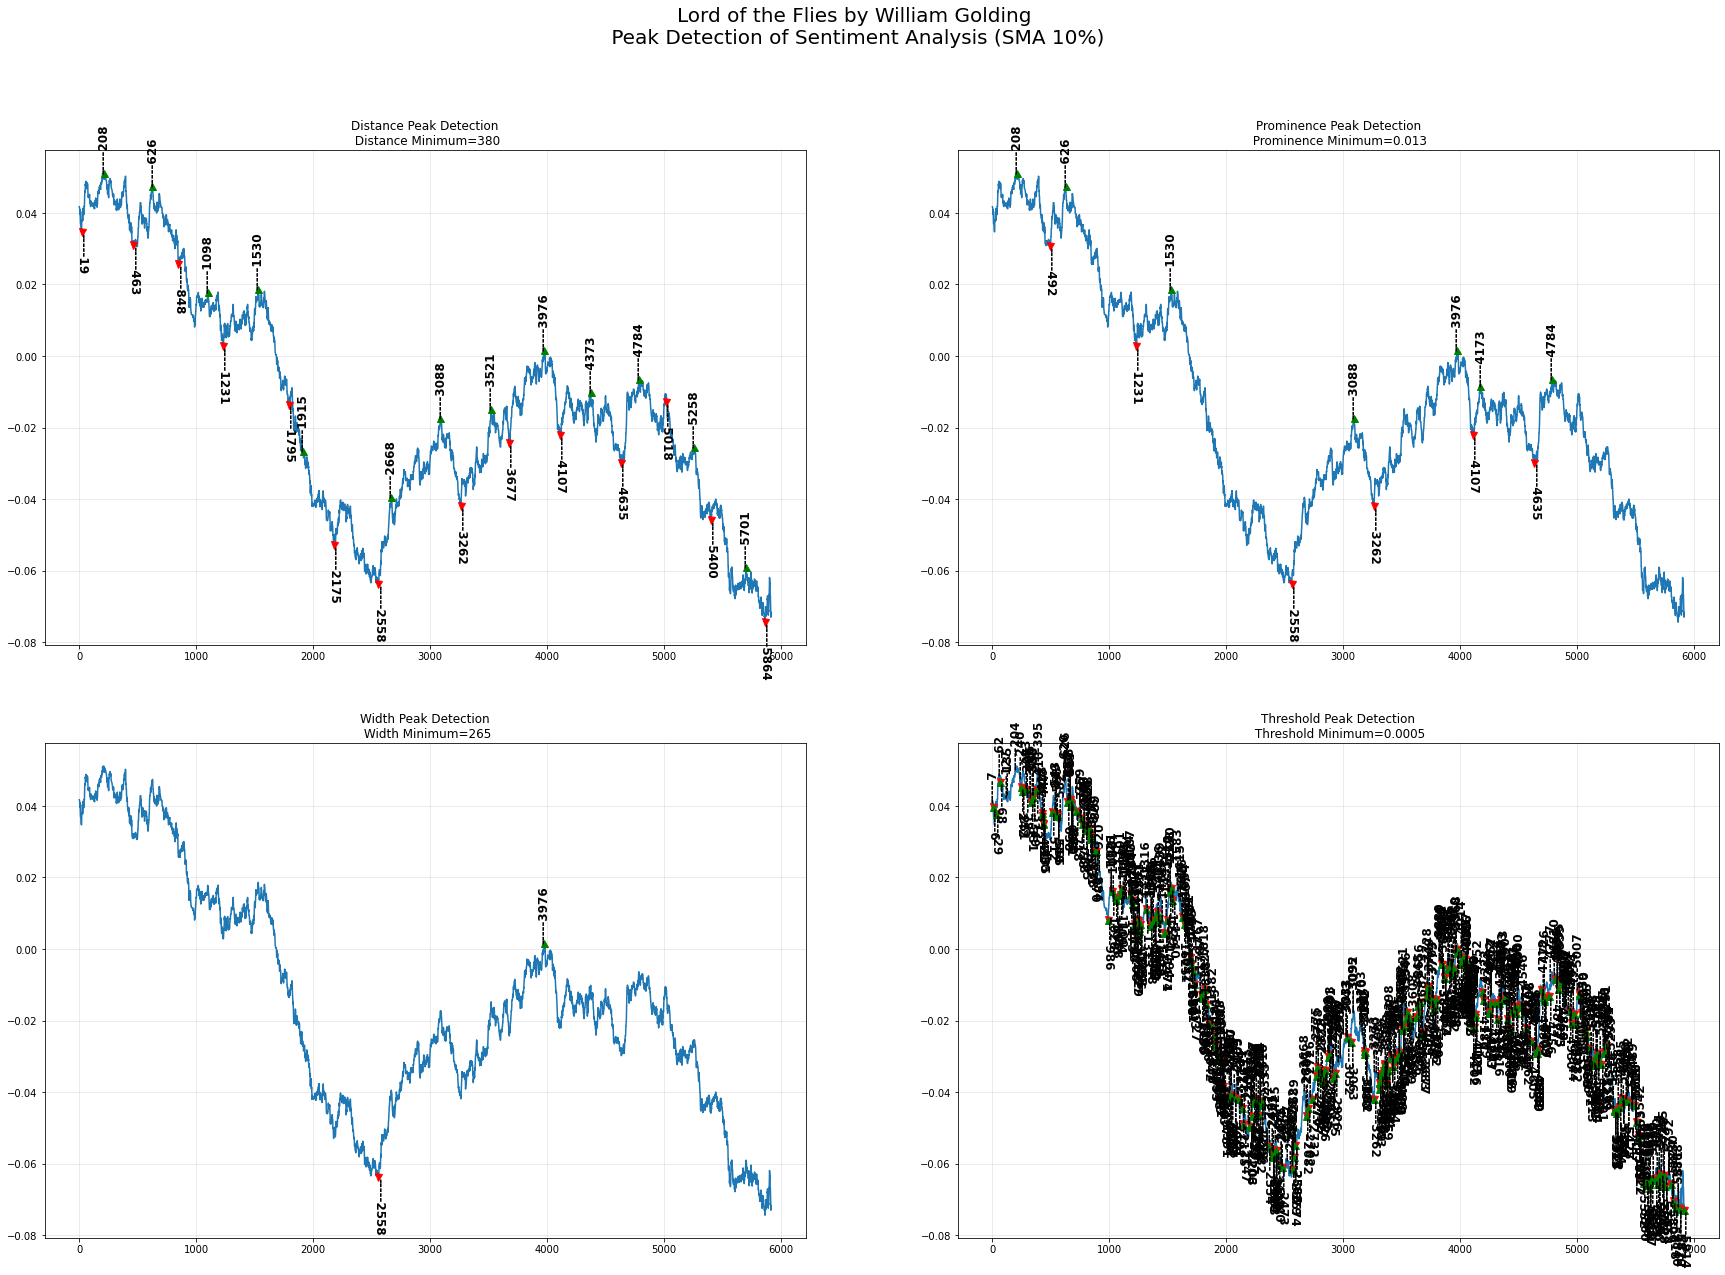

In [68]:
#@title Tune the main Hyperparameter for each of the 4 Peak Detection Algorithms:

Distance_Min = 380 #@param {type:"slider", min:50, max:1000, step:10}
Prominence_Min = 0.013 #@param {type:"slider", min:0.001, max:0.05, step:0.001}
Width_Min = 265 #@param {type:"slider", min:10, max:500, step:5}
Threshold_Min = 0.0005 #@param {type:"slider", min:0.0001, max:0.002, step:0.0001}

plt.rcParams['figure.figsize'] = [30, 20]

model_name = f'{Sentiment_Model.lower()}_sma{window_percent}'

x = novel_df[model_name]

# Peak Algo #1 (by Distance)
distance_min = Distance_Min # 750

# Peak Algo #2 (by Prominence)
prominence_min = Prominence_Min # 0.01

# Peak Algo #3 (by Width)
width_min = Width_Min # 175

# Peak Algo #4 (by Threshold)
threshold_min = Threshold_Min # 0.001


peaks, _ = find_peaks(x, distance=distance_min)
peaks2, _ = find_peaks(x, prominence=prominence_min)      # BEST!
peaks3, _ = find_peaks(x, width=width_min)
peaks4, _ = find_peaks(x, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


x_inv = pd.Series([-x for x in novel_df[model_name].to_list()])

valleys, _ = find_peaks(x_inv, distance=distance_min)
valleys2, _ = find_peaks(x_inv, prominence=prominence_min)      # BEST!
valleys3, _ = find_peaks(x_inv, width=width_min)
valleys4, _ = find_peaks(x_inv, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


plt.subplot(2, 2, 1)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title(f'Distance Peak Detection\n Distance Minimum={distance_min}')
plt.plot(peaks, x[peaks], "^g", markersize=7)
plt.plot(valleys, x[valleys], "vr", markersize=7)
for x_val in peaks:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

plt.subplot(2, 2, 2)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title(f'Prominence Peak Detection\n Prominence Minimum={prominence_min}')
plt.plot(peaks2, x[peaks2], "^g", markersize=7)
plt.plot(valleys2, x[valleys2], "vr", markersize=7)
for x_val in peaks2:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys2:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


plt.subplot(2, 2, 3)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title(f'Width Peak Detection\n Width Minimum={width_min}')
plt.plot(valleys3, x[valleys3], "vr", markersize=7)
plt.plot(peaks3, x[peaks3], "^g", markersize=7)
for x_val in peaks3:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys3:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


plt.subplot(2, 2, 4)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title(f'Threshold Peak Detection\n Threshold Minimum={threshold_min}')
plt.plot(valleys4, x[valleys4], "vr", markersize=7)
plt.plot(valleys4, x[valleys4], "^g", markersize=7)
for x_val in peaks4:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys4:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

plt.suptitle(f'{Novel_Title}\n Peak Detection of Sentiment Analysis (SMA {window_percent}%)', fontsize=20)
plt.grid(True, alpha=0.3)

plt.show()

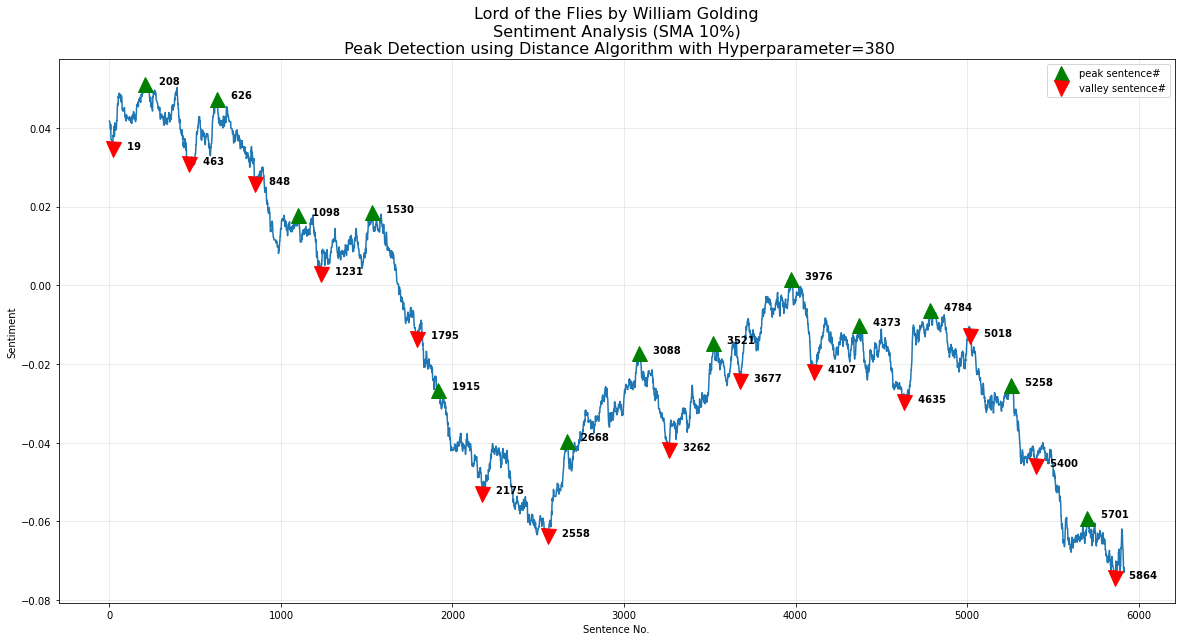



     >>>>> SAVED PLOT TO FILE: [cruxes_plot_Lord_of_the_Flies_by_William_Golding.png] <<<<<


In [72]:
#@title Select a Peak Detection Algorithms to View in Detail (usually Distance or Width is best):

plt.rcParams['figure.figsize'] = [20, 10]

Peak_Algorithm = "Distance" #@param ["Distance", "Prominence", "Width", "Threshold"]

if Peak_Algorithm == 'Distance':
  hyperparam = distance_min
  peaks = peaks
  valleys = valleys
elif Peak_Algorithm == 'Prominence':
  hyperparam = prominence_min
  peaks = peaks2
  valleys = valleys2  
elif Peak_Algorithm == 'Width':
  hyperparam = width_min
  peaks = peaks3
  valleys = valleys3
else:
  # Assume Peak_Algorithm == 'Threshold'
  hyperparam = threshold_min
  peaks = peaks4
  valleys = valleys4

# model_name = f'{Sentiment_Model.lower()}_sma10'

# x = novel_clean_df[model_name]

# peaks2, _ = find_peaks(x, prominence=peak_prominence)  

# x_inv = pd.Series([-x for x in novel_clean_df[model_name].to_list()])
# valleys2, _ = find_peaks(x_inv, prominence=peak_prominence)     

plt.plot(x)
plt.plot(peaks, x[peaks], "^g", markersize=15, label='peak sentence#')
plt.plot(valleys, x[valleys], "vr", markersize=15, label='valley sentence#')
for x_val in peaks:
  plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
for x_val in valleys:
  plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title(f'{Novel_Title}\n Sentiment Analysis (SMA {window_percent}%) \n Peak Detection using {Peak_Algorithm} Algorithm with Hyperparameter={hyperparam}', fontsize=16)
plt.ylabel('Sentiment')
plt.xlabel('Sentence No.')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

filename_plot = f"cruxes_plot_{Novel_Title.replace(' ', '_')}.png"
plt.savefig(filename_plot, dpi=300)
plt.show();

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_plot}] <<<<<')

In [73]:
# Download Crux Point Plot file 'crux_plot.png' to your laptop

files.download(filename_plot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Get Context around Crux Points**

In [74]:
#@title How many Sentences around Crux Point do you want to view for context?

Crux_Sentence_Context_Count = 10 #@param {type:"slider", min:1, max:20, step:1}


**[NOTE] May have to run 2-3x times to save file**

In [75]:
peaks

array([ 208,  626, 1098, 1530, 1915, 2668, 3088, 3521, 3976, 4373, 4784,
       5258, 5701])

In [77]:
%%capture cap --no-stderr

# Print Context around each Sentiment Peak

novel_sent_len = novel_df.shape[0]
halfwin = int(Crux_Sentence_Context_Count/2)
crux_sents_ls = []
nl = '\n'

print('==================================================')
print('============     Peak Crux Points   ==============')
print('==================================================\n\n')

# for i, apeak in enumerate(peaks2):
for i, apeak in enumerate(peaks):
  crux_sents_ls = []
  win_start = max(0, apeak-halfwin)
  win_end = min(apeak+halfwin+1, novel_sent_len)
  # for sent_idx in range(apeak-halfwin,apeak+halfwin+1):
  for sent_idx in range(win_start,win_end):

    sent_cur = novel_df.iloc[sent_idx].text_raw
    if sent_idx == apeak:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)
  
  # context_ls = novel_df.iloc[apeak-halfwin:apeak+halfwin].text_raw
  print(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

print('==================================================')
print('===========     Crux Valley Points    ============')
print('==================================================\n\n')


# for i, avalley in enumerate(valleys2):
for i, avalley in enumerate(valleys):
  crux_sents_ls = []
  win_start = max(0, avalley-halfwin)
  win_end = min(avalley+halfwin+1, novel_sent_len)
  # for sent_idx in range(avalley-halfwin,avalley+halfwin+1):
  for sent_idx in range(win_start,win_end):
    sent_cur = novel_df.iloc[sent_idx].text_raw
    if sent_idx == avalley:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)

  # context_ls = novel_df.iloc[avalley-halfwin:avalley+halfwin].text_raw
  print(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

filename_cruxes = f"cruxes_context_{Novel_Title.replace(' ', '_')}.txt" 

with open(filename_cruxes, 'w') as f:
    f.write(str(cap))

In [78]:
# Download Crux Point Report file 'cruxes.txt' to your laptop

files.download(filename_cruxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **END OF NOTEBOOK**